# Lecture 04 b Solution

## Plot Gaussians with python

Recall that the standard devation (SD) is the square root of the variance. it is a fact that about 0.68 of the probability mass of a Gassian is within 1 SD(either side) of the mean, about 0.95 is within 2 SDs of the mean, and over 0.99 is within 3 SDs of the mean. Thus plotting a Gaussian for x ranging from $\mu-3\sigma$ to $\mu + 3\sigma$ captures over 99% of the probability mass, and we take these as the ranges for the plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


### Before you start

#### **hint** spaced numbers over a specified interval

In [2]:
import numpy as np
mu = 0
sigma = 1
x = np.linspace(mu-3*sigma, mu+3*sigma, 5)
x

array([-3. , -1.5,  0. ,  1.5,  3. ])

#### **hint** meshgrid: coordinate matrices from coordinate vectors.

In [3]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
print(xv)
print(yv)


[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]


In [4]:
x

array([0. , 0.5, 1. ])

In [5]:
y

array([0.        , 0.33333333, 0.66666667, 1.        ])

#### **hint** plot contour

(1, 3)
(4, 1)
(4, 3)


<ipython-input-6-7ae32f16f7f5>:5: RuntimeWarning: invalid value encountered in divide
  z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)


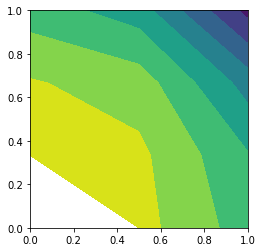

In [6]:
Nx, Ny = (3, 4)
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
xv, yv = np.meshgrid(x, y, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)
print(xv.shape)
print(yv.shape)
print(z.shape)
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

In [7]:
temp = xv**2 + yv**2
t1 = xv**2
t2 = yv**2

In [8]:
print(temp.shape)
print(t1.shape)
print(t2.shape)

(4, 3)
(1, 3)
(4, 1)


In [9]:
type(xv)

numpy.ndarray

In [10]:
xv

array([[0. , 0.5, 1. ]])

In [11]:
yv

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [12]:
xv + yv

array([[0.        , 0.5       , 1.        ],
       [0.33333333, 0.83333333, 1.33333333],
       [0.66666667, 1.16666667, 1.66666667],
       [1.        , 1.5       , 2.        ]])

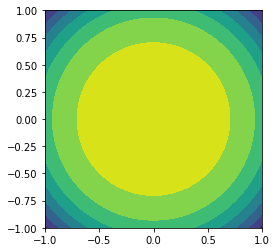

In [13]:
Nx, Ny = (100, 100)
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
xv, yv = np.meshgrid(x, y)#, sparse=True)
z = np.sin(xv**2 + yv**2) / (xv**2 + yv**2)

h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

In [14]:
z.shape

(100, 100)

The multivariate Gaussian distribution of an n-dimensional vector

$x=(x_1,...,x_D)^T$ 

$\begin{equation*}
    p(x|\mu, \Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))
\end{equation*}   $

$\Sigma$ is the D×D covariance matrix,$\mu=(\mu_1,...,\mu_D)^T$

visualize the magnitude of $p(x|\mu, \Sigma)$ as a function of all the D dimensions requires a plot in D+1 dimensions

In [15]:
def multi_gaussian(grid, mu, Sigma):
    """
    Return the multivariate Gaussian distribution on grid.
    grid is an array of variables (x_1, x_2, x_3, ..., x_k) constructed by packing them into a meshgrid
    """
    # TODO
#     print(grid.shape, mu.shape, Sigma.shape)
    D = mu.shape[0] # dimension of variables
    Sigma_det = np.linalg.det(Sigma) # determinant of Covariance matrix
    Sigma_inv = np.linalg.inv(Sigma) # invert of the Convariance matrix
    denominator = np.sqrt((2*np.pi)**D * Sigma_det) # the denominator
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    
    # ============== METHOD 1: ====================
    temp1 = grid-mu
    temp2 = Sigma_inv    
    numerator = np.zeros((grid.shape[0], grid.shape[1]))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            numerator[i,j] = np.dot(np.dot(temp1[i,j].ravel(), temp2),temp1[i,j].ravel())
            
    # ============== METHOD 2: ====================
#     numerator = np.einsum('...k,kl,...l->...', grid-mu, Sigma_inv, grid-mu)
#     print(numerator.shape)
    return np.exp(-numerator / 2) / denominator


### **Task:** Plot 2-dimensional Gaussian with 


1. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right]$, $ \mu = (0,0)^T$

notice that x ranging from $\mu-3\sigma$ to $\mu + 3\sigma$ captures over 99% of the probability mass


In [16]:
import math
def plt_mul_Gaussian(mu, Sigma, N=60):
    x_range_l = mu[0] - 3 * math.sqrt(Sigma[0,0])
    x_range_r = mu[0] + 3 * math.sqrt(Sigma[0,0])
    y_range_l = mu[0] - 3 * math.sqrt(Sigma[1,1])
    y_range_r = mu[0] + 3 * math.sqrt(Sigma[1,1])
    X = np.linspace(x_range_l, x_range_r, N)
    Y = np.linspace(y_range_l, y_range_r, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X,Y))
    print(pos.shape)
    Z = multi_gaussian(pos, mu, Sigma)

    # Create a surface plot and projected contour plot under it
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d') #fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=1, antialiased=True,cmap=cm.viridis)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.2, cmap=cm.viridis)

    # Adjust the limits, ticks 
    ax.set_zlim(-0.2,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    plt.show()

1. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right]$, $ \mu = (0,0)^T$

(60, 60, 2)


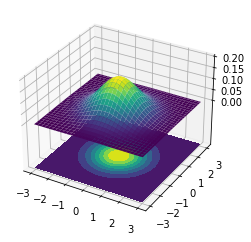

In [17]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  1]])
plt_mul_Gaussian(mu, Sigma)

2. 
$\Sigma = \left[\begin{array}{cc}
    1 & -1 \\
    -1 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


(60, 60, 2)


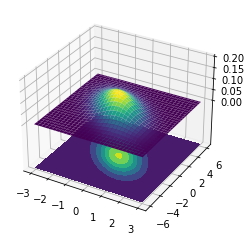

In [18]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -1], [-1,  4]])
plt_mul_Gaussian(mu, Sigma)

3. 
$\Sigma = \left[\begin{array}{cc}
    1 & 0 \\
    0 & 4
\end{array}\right]$,  $ \mu = (0,0)^T$


(60, 60, 2)


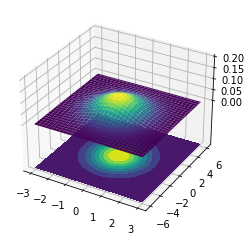

In [19]:
# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  4]])
plt_mul_Gaussian(mu, Sigma)